### Auto Encoder
- 주성분 분석을 하면서 컬럼의 수는 유지하는 방법이다. <br><br>
- 강화학습 전에 auto-encoder를 통해 noise를 제거 하게 되면 데이터는 축소되고 특징은 더 살아나게 된다. <br><br>
- 비지도학습 딥러닝 모델 <br><br>
- 입력값을 압축시킨 후 다시 압축된 정보를 복원해서 입력 값과 동일 출력값으로 학습되는 모델 <br><br>
- 학습 과정을 통해 최대한 입력값과 출력값이 일치되도록 모델 파라미터가 최적화 된다. <br><br>
- 오토 인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어 주로 차원 축소의 목적으로 활용 <br><br>

In [148]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=100)

### 손글씨 숫자 데이터

In [149]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [150]:
(x_train , y_train ), (x_test , y_test) = keras.datasets.mnist.load_data()

In [151]:
x_train.shape

(60000, 28, 28)

In [152]:
# data의 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

In [153]:
x_test.shape

(10000, 784)

### Tensorflow model 만들기

In [154]:
InputModel = keras.layers.Input(shape=(28*28))

In [155]:
# EncoderLayer는 3차원으로 축소된 입력값
EncodedLayer = keras.layers.Dense(32,activation = 'relu')(InputModel) # 이렇게 하면 두개층이 붙은 것이다.

In [156]:
# DecodeLayer는 MNIST차원으로 복원된 값
DecodeLayer = keras.layers.Dense(28 * 28,activation = 'sigmoid')(EncodedLayer) # 0아니면 1값으로 비교해서 이게 쓸만한건지 안쓸만한건지 구분하기 위해서

In [157]:
# AutoEncoderModel은 입력값과 복원값을 최소화 하는 과정
AutoencoderModel = keras.models.Model(InputModel , DecodeLayer)

In [158]:
AutoencoderModel.compile(optimizer='adam',loss='binary_crossentropy')

In [159]:
history = AutoencoderModel.fit(x_train,x_train,batch_size=256,epochs=20,shuffle=True,
                               validation_data = (x_test, x_test)
                               )

Epoch 1/20
6000/6000 [==============================] - 4s 681us/step - loss: 0.1289 - val_loss: 0.0972
Epoch 2/20
6000/6000 [==============================] - 4s 673us/step - loss: 0.0966 - val_loss: 0.0942
Epoch 3/20
6000/6000 [==============================] - 4s 672us/step - loss: 0.0954 - val_loss: 0.0940
Epoch 4/20
6000/6000 [==============================] - 4s 655us/step - loss: 0.0950 - val_loss: 0.0932
Epoch 5/20
6000/6000 [==============================] - 4s 678us/step - loss: 0.0947 - val_loss: 0.0935
Epoch 6/20
6000/6000 [==============================] - 4s 669us/step - loss: 0.0945 - val_loss: 0.0930
Epoch 7/20
6000/6000 [==============================] - 4s 677us/step - loss: 0.0943 - val_loss: 0.0932
Epoch 8/20
6000/6000 [==============================] - 4s 700us/step - loss: 0.0942 - val_loss: 0.0928
Epoch 9/20
6000/6000 [==============================] - 4s 640us/step - loss: 0.0941 - val_loss: 0.0928
Epoch 10/20
6000/6000 [==============================] - 4s 720u

In [160]:
DecodedDigits = AutoencoderModel.predict(x_test)

313/313 [==============================] - 0s 404us/step


In [161]:
print(x_test.shape)
print(DecodedDigits.shape)

(10000, 784)
(10000, 784)


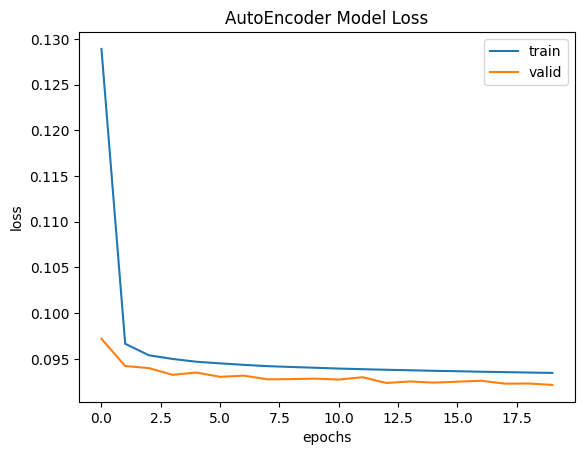

In [162]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='valid')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('AutoEncoder Model Loss')
plt.legend()

plt.show()

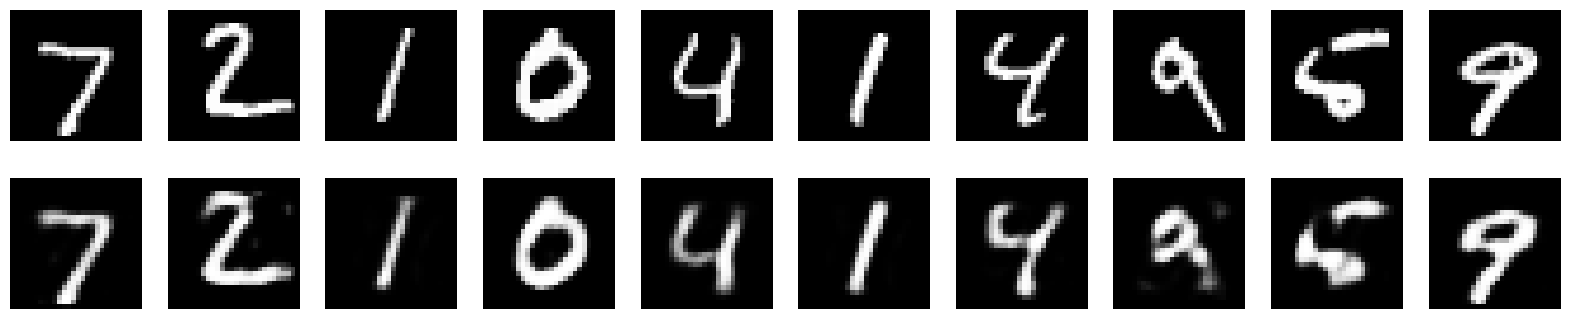

In [163]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n , i+1)

    plt.imshow(x_test[i].reshape(28,28))
    
    plt.axis('off')

    plt.gray()
    ax = plt.subplot(2, n , i+1+n)

    plt.imshow(DecodedDigits[i].reshape(28,28))
    
    plt.axis('off')

    plt.gray()